In [1]:
#push!(LOAD_PATH, pwd());
using TSSM

 *** OPENMP n_threads =           8


In [2]:
Nx=2048

2048

In [5]:
## Cubic Nonlinear Schrödinger equation

$$\mathrm{i}\frac{\partial \psi}{\partial t}=-\frac{1}{2}\frac{\partial^2\psi}{\partial x^2}+\kappa  |\psi|^2\psi,
$$ $\kappa=-1$ and initial condition
$$\psi(x,0)=\sum_{j=1}^2\frac{a_j}{\cosh(a_j(x-c_j))}\exp^{-ib_j x}$$
the parameters as below.

LoadError: LoadError: syntax: extra token "mathrm" after end of expression
while loading In[5], in expression starting on line 3

In [6]:
V(x)=1/2*x^2;
m = SchroedingerReal1D(Nx, -50, 50, potential=V, mass=1.0,cubic_coupling=390)

TSSM.SchroedingerReal1D{Float64}(Ptr{Void} @0x0000000002af57d0)

In [7]:
psi=wave_function(m)

TSSM.WfSchroedingerReal1D{Float64}(Ptr{Void} @0x0000000002b4b5f0,TSSM.SchroedingerReal1D{Float64}(Ptr{Void} @0x0000000002af57d0))

In [8]:
f(x)=exp(-x^2)
set!(psi, f)

In [9]:
include("groundstate.jl")

groundstate! (generic function with 1 method)

In [10]:
groundstate!(psi, extrapolation_order=2)
save(psi,"groundstate.hf5")

    0   2.630611986619972e+01   4.438827267428123e+01   1.000e+06   5.790e-01   1.356e+01      0.03   2.362911726260375e+01   1.000e+06   4.373e-01
changed step size, old:   5.000000000000000e-02  new:   2.500000000000000e-02
    1   2.156976807962496e+01   3.400846594184426e+01   4.736e+00   1.701e-01   1.604e-01      0.07
    2   2.121246576417245e+01   3.433797441873096e+01   3.573e-01   8.872e-02   6.816e-02      0.07
    3   2.110219138165417e+01   3.454071476271563e+01   1.103e-01   5.448e-02   3.798e-02      0.07
    4   2.105699700320985e+01   3.466276575681472e+01   4.519e-02   3.687e-02   2.431e-02      0.08
    5   2.103510199786044e+01   3.474084043819031e+01   2.190e-02   2.657e-02   1.690e-02      0.08
    6   2.102326749639462e+01   3.479378453529442e+01   1.183e-02   2.000e-02   1.241e-02      0.08
    7   2.101636212362690e+01   3.483143799272362e+01   6.905e-03   1.554e-02   9.466e-03      0.08
    8   2.101210128240562e+01   3.485925607128851e+01   4.261e-03   1.236e

In [11]:
using PyPlot

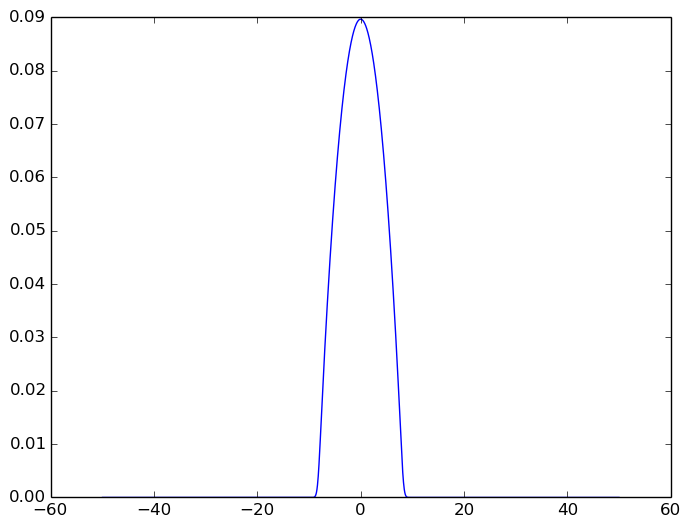

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f61cf029b10>

In [12]:
x=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)
plot(x, real(u[1:end-2]).^2)

In [13]:
xmin=-400
xmax=400
const v0=1.4
const k=11.4
V(x)=v0*cos(k*x)
m = Schroedinger1D(8*Nx, xmin, xmax, potential=V, cubic_coupling=390)
psi=wave_function(m)

TSSM.WfSchroedinger1D{Float64}(Ptr{Void} @0x0000000002d4f2e0,TSSM.Schroedinger1D{Float64}(Ptr{Void} @0x0000000002f3d050))

In [14]:
load!(psi,"groundstate.hf5")

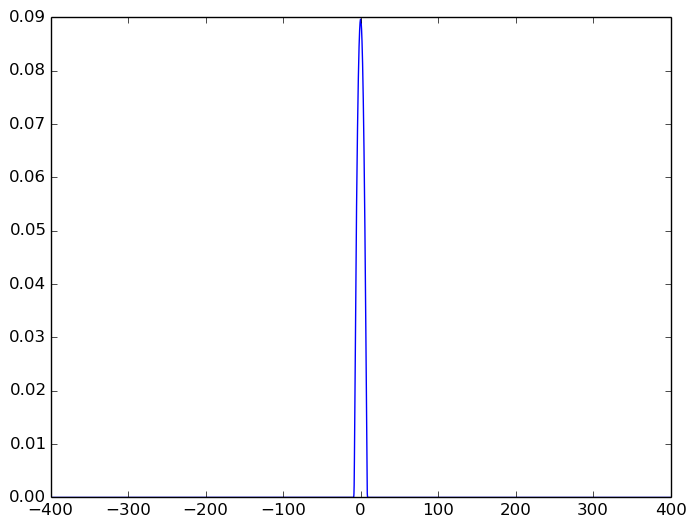

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f61cee8e2d0>

In [15]:
x=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)
plot(x, real(u[1:end]).^2)

In [16]:
include("time_stepper.jl")
include("schemes.jl");

In [17]:
x = get_nodes(m);
to_real_space!(psi);
u = get_data(psi, true);

tend=20.0
t0=0.0
out=0
tol=1e-8

maxsteps=10^6
plotdata=abs(u)
steps=zeros(maxsteps)
mytime=zeros(maxsteps)
told=t0
nsteps=0
load!(psi,"groundstate.hf5")
    @time  for t in adaptive_time_stepper(psi, t0, tend, 0.001, tol, palindromic_scheme_56, "AB")
    if nsteps%100==0
     @printf("t=%20.18E \n",t)
    end
    if out==1
      to_real_space!(psi)
      plotdata = [plotdata abs(u)]
      end
    nsteps=nsteps+1
    mytime[nsteps+1]=t
    steps[nsteps]=t-told
      told=t
      
  end



t=1.000000000000000021E-03 
t=4.983201486062530661E-01 
t=1.083338303579113537E+00 
t=1.576038274081245083E+00 
t=1.996403908111849423E+00 
t=2.403875010233367693E+00 
t=2.807269413595737451E+00 
t=3.210001581586341413E+00 
t=3.613898643074748840E+00 
t=4.020016005357173405E+00 
t=4.429784086968945545E+00 
t=4.844993794267490550E+00 
t=5.267844862344423618E+00 
t=5.699861394153372451E+00 
t=6.141547844394696476E+00 
t=6.589603750155276884E+00 
t=7.043251573336169358E+00 
t=7.499414824736458485E+00 
t=7.957104863347987056E+00 
t=8.417849981734258691E+00 
t=8.878849168618659249E+00 
t=9.345355014178890585E+00 
t=9.812840199241534833E+00 
t=1.028781924915789148E+01 
t=1.076531089099065674E+01 
t=1.125043047367004512E+01 
t=1.173700774440090022E+01 
t=1.222749999871446036E+01 
t=1.271707896071322530E+01 
t=1.320943756548532022E+01 
t=1.370815662386363520E+01 
t=1.420481049099072024E+01 
t=1.469681542311039735E+01 
t=1.518917095826955510E+01 
t=1.568547839866259608E+01 
t=1.6174286753419568

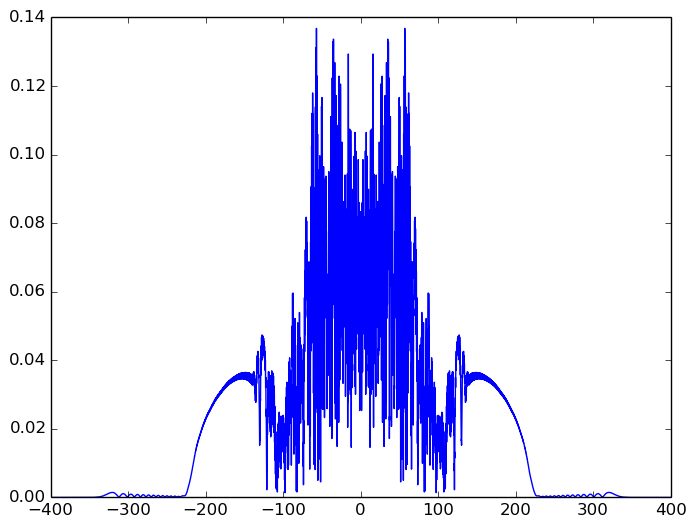

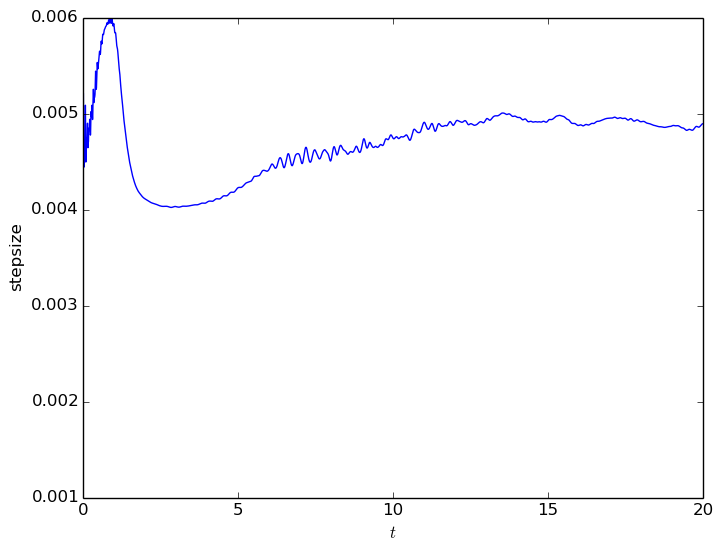

In [18]:
x=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)
plot(x, abs(u))
figure(2)
plot(mytime[1:nsteps-1], steps[1:nsteps-1])#last short step not plotted
  xlabel("\$t\$")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")

In [19]:
psia=wave_function(m)
psi_ref=wave_function(m)
psi=wave_function(m)

TSSM.WfSchroedinger1D{Float64}(Ptr{Void} @0x0000000004533b70,TSSM.Schroedinger1D{Float64}(Ptr{Void} @0x0000000002f3d050))

In [20]:
include("my_helper.jl")
tend=20.0;
t0=0.0;
tols=[-5,-8,-10];
out=0;
stepmin_ex=0;
latex=1;

In [21]:
load!(psi_ref,"groundstate.hf5")
@time for t in adaptive_time_stepper(psi_ref, t0, tend, 0.01, 1e-12, palindromic_scheme_56, "AB")
end
save(psi_ref,"psi_ref_groundstate.hf5")

148.

In [22]:
load!(psi_ref,"psi_ref_groundstate.hf5")
#distance(psia,psi_ref)

In [23]:
@printf("Method & \\# steps adaptive & \\# steps equidist & time adaptive & time equidist \\\\ \\hline \n")
maxsteps=10^6
nrep=1
for tol in tols
    for scheme in schemes
        steps_a=zeros(maxsteps)
        mytime=zeros(maxsteps)
        time_a=0.0
        nsteps_a=0
        for n in 1:nrep #average time over nrep runs
            told=0.0
            nsteps_a=0
            load!(psia,"groundstate.hf5")
            time_a =time_a+ @elapsed  for t in adaptive_time_stepper2(psia, t0, tend, 0.01, 10.0^tol, scheme, "AB")
                    nsteps_a=nsteps_a+1
                    steps_a[nsteps_a]=t-told
                    mytime[nsteps_a]=t
                    told=t    
            end
        end
        time_a=time_a/nrep
        stepmin=minimum(steps_a[1:nsteps_a-1])
        if out==1
            savefig!(scheme,schemes,mytime,steps_a,nsteps_a)
        end
        if stepmin_ex==1
            stepmin=calc_stepmin(psi_ref,psia,psi,scheme,soliton)
        end 
        steps=zeros(maxsteps)
        mytime=zeros(maxsteps)
        nsteps=0
        time=0.0
        for n in 1:nrep #average time over nrep runs
            told=0.0
            nsteps=0
            load!(psi,"groundstate.hf5")
            time = time + @elapsed  for t in equidistant_time_stepper(psi, t0, tend, stepmin, scheme, "AB")
                nsteps=nsteps+1
                steps[nsteps]=t-told
                mytime[nsteps]=t
                told=t 
            end
        end
        time=time/nrep
        if latex==1
            latextable(scheme,schemes,tol,nsteps_a,nsteps,time_a,time)
        end
    end
end

420483 seconds (1.13 M allocations: 19.099 MB, 0.01% gc time)
Method & \# steps adaptive & \# steps equidist & time adaptive & time equidist \\ \hline 
\texttt{Emb 4/3 AK p}, TOL = $ 10^{-5} $ & $ 2357 $ & $ 3290 $ & $ 9.754 $ & $ 7.705 $ \\ 
\texttt{PP 3/4 A}, TOL = $ 10^{-5} $ & $ 4323 $ & $ 4675 $ & $ 14.112 $ & $ 7.445 $ \\ 
\texttt{PP 5/6 A}, TOL = $ 10^{-5} $ & $ 4200 $ & $ 4661 $ & $ 35.801 $ & $ 19.618 $ \\ \hline 
\texttt{Emb 4/3 AK p (defect)}, TOL = $ 10^{-5} $ & $ 2170 $ & $ 2362 $ & $ 11.568 $ & $ 5.612 $ \\ 
\texttt{PP 3/4 A (defect)}, TOL = $ 10^{-5} $ & $ 4323 $ & $ 4676 $ & $ 11.035 $ & $ 5.397 $ \\ 
\texttt{PP 5/6 A (defect)}, TOL = $ 10^{-5} $ & $ 2109 $ & $ 2719 $ & $ 21.452 $ & $ 13.252 $ \\ \hline 
\texttt{Emb 4/3 AK p}, TOL = $ 10^{-8} $ & $ 12090 $ & $ 13100 $ & $ 42.032 $ & $ 18.862 $ \\ 
\texttt{PP 3/4 A}, TOL = $ 10^{-8} $ & $ 24360 $ & $ 26382 $ & $ 73.992 $ & $ 36.923 $ \\ 
\texttt{PP 5/6 A}, TOL = $ 10^{-8} $ & $ 4768 $ & $ 5547 $ & $ 33.174 $ & $ 16.996 $

In [24]:
 nstep=10000
    tol=1e-8
    dt=0.001
    @printf("Method & %d steps without errorestimator & %d steps with errorestimator\\\\ \\hline \n",nstep,nstep)
    for scheme in schemes
    load!(psi,"groundstate.hf5")
    
        time1 = @elapsed  for t in 1:nstep
            step!(psi, dt, scheme,"AB")
        end
        psi2=clone(psi)
        time2 = @elapsed  for t in 1:nstep
        if typeof(scheme)==PalindromicScheme
           copy!(psi, psi2)
           step_palindromic!(psi, psi2, dt, scheme.scheme, "AB")
           err = 0.5*distance(psi, psi2)/tol
        end
        if typeof(scheme)==EmbeddedScheme
           copy!(psi, psi2)
           step_embedded!(psi, psi2, dt, scheme.scheme1, scheme.scheme2, "AB")
           err = distance(psi, psi2)/tol
        end  
        if typeof(scheme)==DefectBasedScheme
            step_defect_based!(psi, psi2, dt, scheme.scheme, "AB")
            err = dt*norm(psi2)/(scheme.order+1)/tol
        end
    end
        if scheme==schemes[1]
            @printf("\\texttt{Emb 4/3 AK p} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[2]
            @printf(    "\\texttt{PP 3/4 A} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[3]
        @printf(    "\\texttt{PP 5/6 A} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \\hline \n",time1,time2)
        end
        if scheme==schemes[4]
            @printf("\\texttt{Emb 4/3 AK p (defect)} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[5]
            @printf(    "\\texttt{PP 3/4 A (defect)} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[6]
        @printf(    "\\texttt{PP 5/6 A (defect)} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \\hline \n",time1,time2)
        end
    end

10} $ & $ 10404 $ & $ 12172 $ & $ 92.842 $ & $ 32.689 $ \\ \hline 
Method & 10000 steps without errorestimator & 10000 steps with errorestimator\\ \hline 
\texttt{Emb 4/3 AK p} & $ 14.282 $ & $ 44.304 $ \\ 
\texttt{PP 3/4 A} & $ 9.880 $ & $ 32.875 $ \\ 
\texttt{PP 5/6 A} & $ 36.989 $ & $ 107.550 $ \\ \hline 
\texttt{Emb 4/3 AK p (defect)} & $ 23.259 $ & $ 52.927 $ \\ 
\texttt{PP 3/4 A (defect)} & $ 16.438 $ & $ 35.303 $ \\ 
\texttt{PP 5/6 A (defect)} & $ 41

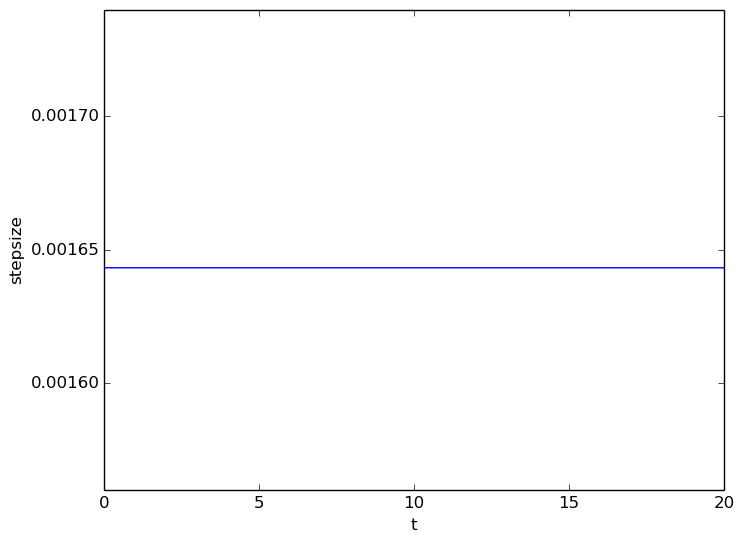

.639 $ & $ 91.585 $ \\ \hline 


In [25]:
figure(1)
  hold(false)
plot(mytime[1:nsteps-1], steps[1:nsteps-1])
  xlabel("t")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")

.749434 seconds (414.81 k allocations: 174.696 GB, 4.28% gc time)


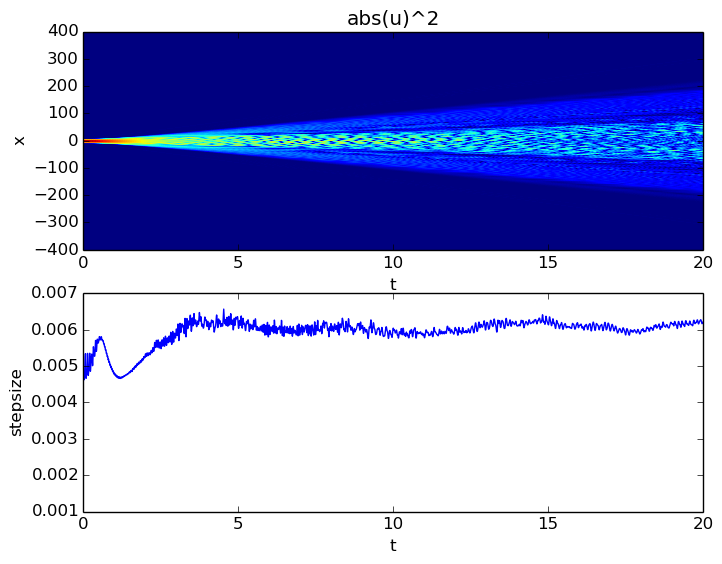

In [17]:
figure(1)
  hold(false)
  if out==1
  subplot(2, 1, 1)
    pcolorfast(mytime[1:nsteps+1],x,plotdata)
  xlabel("t")
  ylabel("x")
  #colorbar()
  axis([t0,tend,xmin,xmax])
  title("abs(u)^2")

  subplot(2, 1, 2)
  end
plot(mytime[1:nsteps-1], steps[1:nsteps-1])
  xlabel("t")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")